# Importação das Biblioecas

In [398]:
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.metrics import confusion_matrix, accuracy_score

# Importar os Dados

### Dados trimestrais

In [399]:
quarterly_reports = pd.read_csv("./../assets/dados.csv")
coluns_to_remove = list(filter(lambda colum: 'Unnamed' in colum, quarterly_reports.columns))
quarterly_reports = quarterly_reports.drop(columns=coluns_to_remove)
quarterly_reports[quarterly_reports.isna()] = 0
quarterly_reports.to_csv("./../assets/dados.csv")
ticker = pd.read_csv("./../assets/url.csv")['Nome'] + '11'
quarterly_reports['ticker'] = ticker
print(len(coluns_to_remove),coluns_to_remove)
quarterly_reports

1 ['Unnamed: 0']


,1.2.1 sum,1.2.1 mean,1.2.1 count,1.2.1 stdr,1.2.2 sum,1.2.2 mean,1.2.2 count,1.2.2 stdr,1.2.11 sum,1.2.11 mean,...,qualquer stdr,3.1.1 sum,3.1.1 mean,3.1.1 count,3.1.1 stdr,3.1.2 sum,3.1.2 mean,3.1.2 count,3.1.2 stdr,ticker
0,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
1,4475406.0,4475406.0,1.0,443065194.0,1.567401e+08,5.805189e+06,27.0,5.747137e+08,73738202.72,4.915880e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
2,4688049.6,4688049.6,1.0,464116910.4,1.532604e+08,6.966381e+06,22.0,6.897587e+08,76949517.70,5.496394e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
3,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
4,0.0,0.0,0.0,0.0,1.748127e+08,1.165418e+07,15.0,1.153764e+09,50223493.13,8.370582e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
229,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
230,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
231,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11


In [400]:
data_ticker = pd.DataFrame()
for ticker in quarterly_reports['ticker'].unique():
    tag = ticker + ".SA"
    print(tag)
    temp_data_ticker = yf.download(tickers=tag, multi_level_index=False)
    temp_data_ticker['ticker'] = ticker
    data_ticker = pd.concat([data_ticker,temp_data_ticker])
data_ticker

AAZQ11.SA


[*********************100%***********************]  1 of 1 completed


AGRX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGRX11.SA']: YFInvalidPeriodError("AGRX11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


BBGO11.SA


[*********************100%***********************]  1 of 1 completed


CPTR11.SA


[*********************100%***********************]  1 of 1 completed


CRAA11.SA


[*********************100%***********************]  1 of 1 completed


DCRA11.SA


[*********************100%***********************]  1 of 1 completed


EGAF11.SA


[*********************100%***********************]  1 of 1 completed


FGAA11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLEM11.SA']: YFTzMissingError('possibly delisted; no timezone found')


FLEM11.SA
FZDB11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FZDB11.SA']: YFInvalidPeriodError("FZDB11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


GCRA11.SA


[*********************100%***********************]  1 of 1 completed


GRWA11.SA


[*********************100%***********************]  1 of 1 completed


HGAG11.SA


[*********************100%***********************]  1 of 1 completed


IAAG11.SA


[*********************100%***********************]  1 of 1 completed


IAGR11.SA


[*********************100%***********************]  1 of 1 completed


JGPX11.SA


[*********************100%***********************]  1 of 1 completed


KNCA11.SA


[*********************100%***********************]  1 of 1 completed


KOPA11.SA


[*********************100%***********************]  1 of 1 completed


LSAG11.SA


[*********************100%***********************]  1 of 1 completed


NCRA11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NCRA11.SA']: YFInvalidPeriodError("NCRA11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


OIAG11.SA


[*********************100%***********************]  1 of 1 completed


PLCA11.SA


[*********************100%***********************]  1 of 1 completed


RURA11.SA


[*********************100%***********************]  1 of 1 completed


RZAG11.SA


[*********************100%***********************]  1 of 1 completed


RZEO11.SA


[*********************100%***********************]  1 of 1 completed


SNAG11.SA


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,ticker,Adj Close
Date,,,,,,,
2022-12-21,6.999204,7.013161,6.978269,6.978269,78854.0,AAZQ11,NaN
2022-12-22,6.978269,7.117834,6.629355,7.117834,31942.0,AAZQ11,NaN
2022-12-23,6.978269,6.978269,6.838703,6.978269,6389.0,AAZQ11,NaN
2022-12-26,6.964313,7.041074,6.873596,7.041074,38590.0,AAZQ11,NaN
2022-12-27,6.768920,6.964311,6.559572,6.964311,21828.0,AAZQ11,NaN
...,...,...,...,...,...,...,...
2025-04-11,9.481584,9.481584,9.392601,9.402488,0.0,SNAG11,NaN
2025-04-14,9.580452,9.590339,9.461809,9.491470,0.0,SNAG11,NaN
2025-04-15,9.620000,9.669435,9.540904,9.540904,0.0,SNAG11,NaN


In [401]:
data_ticker_label = data_ticker.reset_index()
data_ticker_label['Date'] = data_ticker_label['Date'].dt.to_period('M')
data_ticker_label = data_ticker_label.groupby(by=['ticker','Date']).var()
data_ticker_label = data_ticker_label.drop(columns=['Close','High','Low','Volume','Adj Close'])
data_ticker_label = data_ticker_label.reset_index()
data_ticker_label

,ticker,Date,Open
0,AAZQ11,2022-12,0.011244
1,AAZQ11,2023-01,0.014352
2,AAZQ11,2023-02,0.003305
3,AAZQ11,2023-03,0.001440
4,AAZQ11,2023-04,0.006627
...,...,...,...
682,SNAG11,2024-12,0.081189
683,SNAG11,2025-01,0.014899
684,SNAG11,2025-02,0.007978
685,SNAG11,2025-03,0.002596


In [402]:
data_ticker_label['Open'].describe()

count      683.000000
mean        33.576533
std        495.746533
min          0.000000
25%          0.007155
50%          0.076493
75%          0.651337
max      12317.899726
Name: Open, dtype: float64

<Axes: xlabel='Open'>

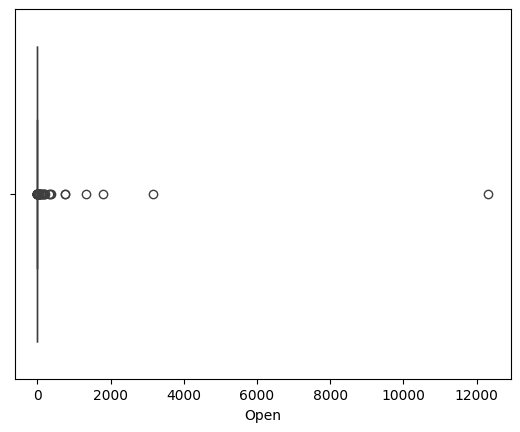

In [403]:
sns.boxplot(x=data_ticker_label['Open'])

<Axes: xlabel='Open'>

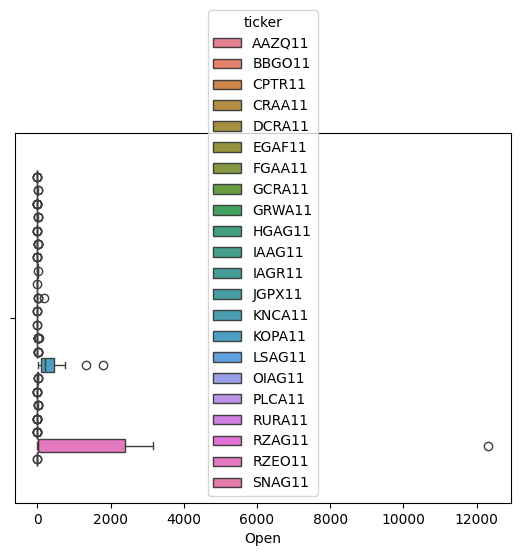

In [404]:
sns.boxplot(x=data_ticker_label['Open'],hue=data_ticker_label['ticker'])

<Axes: xlabel='Open', ylabel='Count'>

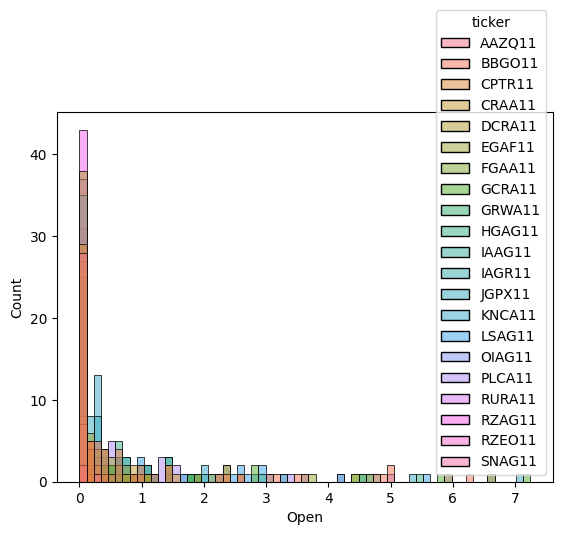

In [405]:
graph_data_ticker = data_ticker_label[data_ticker_label['Open'] < 8]
sns.histplot(x=graph_data_ticker['Open'], hue=graph_data_ticker['ticker'])

<Axes: xlabel='Open'>

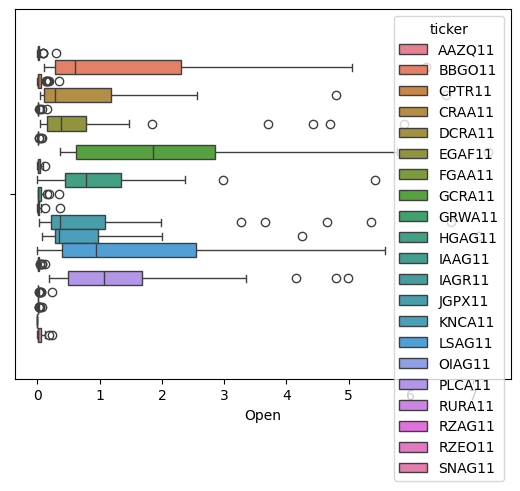

In [406]:
sns.boxplot(x=graph_data_ticker['Open'],hue=graph_data_ticker['ticker'])

In [407]:
tickers = data_ticker_label['ticker'].unique()
tickers

array(['AAZQ11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11',
       'FGAA11', 'GCRA11', 'GRWA11', 'HGAG11', 'IAAG11', 'IAGR11',
       'JGPX11', 'KNCA11', 'KOPA11', 'LSAG11', 'OIAG11', 'PLCA11',
       'RURA11', 'RZAG11', 'RZEO11', 'SNAG11'], dtype=object)

In [408]:
# Baixar os dados do índice
indice = yf.download(tickers=['XFIX11.SA'], multi_level_index=False)
# indice.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
indice = indice.drop(columns=['Close', 'Volume', 'Low', 'High'])
indice.columns = ['index']
# Criar o dataframe beta
print(indice.columns)
variance_index = indice['index'].var()
beta = pd.DataFrame()
drawdown = pd.DataFrame()
# Iterar sobre os tickers
for ticker in tickers:
    # Baixar os dados do ticker
    print(ticker)
    ticker_data = yf.download(tickers=[ticker+'.SA'], multi_level_index=False)
    # usando ticker_data calcule drawdown
    low = ticker_data['Low'].reset_index()
    low['Date'] = low['Date'].dt.to_period('M')
    low = low.groupby(low['Date']).min()
    high = ticker_data['High'].reset_index()
    high['Date'] = high['Date'].dt.to_period('M')
    high = high.groupby(high['Date']).max()
    drawdown_in_loop = (high['High'] - low['Low']) / high['High']
    drawdown_in_loop = drawdown_in_loop.reset_index()
    drawdown_in_loop['ticker'] = ticker
    drawdown = pd.concat([drawdown, drawdown_in_loop], ignore_index=True)
    # Resetar o índice para garantir que as datas sejam alinhadas corretamente
    ticker_data = ticker_data.drop(columns=['Close', 'Volume', 'Low', 'High'])
    ticker_data.columns = ['ticker']
    merge_index_ticker = pd.merge(indice, ticker_data, on='Date', how='inner')
    cov = merge_index_ticker['ticker'].cov(merge_index_ticker['index'])
    print(f"Covariância entre {ticker} e o índice: {cov}")
    beta_calculated = cov / variance_index
    print(f"Beta de {ticker}: {beta_calculated}")
    beta = pd.concat([pd.DataFrame({'ticker': [ticker], 'Beta': [beta_calculated]}), beta], ignore_index=True)
    # # Mesclar os dados do índice e do ticker para alinhamento
    # merged_data = pd.merge(indice[['Date', 'Open']], ticker_data[['Date', 'Open']], on='Date', suffixes=('_indice', '_ticker'))
    
    # # Calcular a covariância acumulada até cada mês
    # merged_data['Month'] = merged_data['Date'].dt.to_period('M')
    # for month in merged_data['Month'].unique():
    #     monthly_data = merged_data[merged_data['Month'] <= month]
    #     covariance = monthly_data['Open_ticker'].cov(monthly_data['Open_indice'])
    #     beta = beta.append({'Ticker': ticker, 'Month': month, 'Covariance': covariance}, ignore_index=True)

# Exibir o dataframe beta
beta

[*********************100%***********************]  1 of 1 completed


Index(['index'], dtype='object')
AAZQ11


[*********************100%***********************]  1 of 1 completed


Covariância entre AAZQ11 e o índice: 0.11243009304444522
Beta de AAZQ11: 0.15448163698388237
BBGO11


[*********************100%***********************]  1 of 1 completed


Covariância entre BBGO11 e o índice: 5.155409299118954
Beta de BBGO11: 7.08365568580461
CPTR11


[*********************100%***********************]  1 of 1 completed


Covariância entre CPTR11 e o índice: 1.7478723164359444
Beta de CPTR11: 2.401618368981467
CRAA11


[*********************100%***********************]  1 of 1 completed


Covariância entre CRAA11 e o índice: 2.4219171037623863
Beta de CRAA11: 3.3277720287981363
DCRA11


[*********************100%***********************]  1 of 1 completed


Covariância entre DCRA11 e o índice: 0.33290064315869944
Beta de DCRA11: 0.4574134461297059
EGAF11


[*********************100%***********************]  1 of 1 completed


Covariância entre EGAF11 e o índice: 5.859627773932679
Beta de EGAF11: 8.051268713933222
FGAA11


[*********************100%***********************]  1 of 1 completed


Covariância entre FGAA11 e o índice: 0.12430133308846224
Beta de FGAA11: 0.17079300474467754
GCRA11


[*********************100%***********************]  1 of 1 completed


Covariância entre GCRA11 e o índice: 2.1889706404574394
Beta de GCRA11: 3.0076980165252096
GRWA11


[*********************100%***********************]  1 of 1 completed


Covariância entre GRWA11 e o índice: 0.36057007359302673
Beta de GRWA11: 0.49543190535322357
HGAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre HGAG11 e o índice: -6.1866304062929975
Beta de HGAG11: -8.500578152155343
IAAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre IAAG11 e o índice: 0.16590852081128923
Beta de IAAG11: 0.2279622758505647
IAGR11


[*********************100%***********************]  1 of 1 completed


Covariância entre IAGR11 e o índice: -0.12893993707374715
Beta de IAGR11: -0.1771665575681507
JGPX11


[*********************100%***********************]  1 of 1 completed


Covariância entre JGPX11 e o índice: 3.2874727380564113
Beta de JGPX11: 4.517066172969174
KNCA11


[*********************100%***********************]  1 of 1 completed


Covariância entre KNCA11 e o índice: 5.4290045348234175
Beta de KNCA11: 7.459582083605495
KOPA11


[*********************100%***********************]  1 of 1 completed


Covariância entre KOPA11 e o índice: 8.189558924994051
Beta de KOPA11: 11.25264984356918
LSAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre LSAG11 e o índice: 0.8064934110757481
Beta de LSAG11: 1.1081412367989871
OIAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre OIAG11 e o índice: 0.11422512243337322
Beta de OIAG11: 0.15694805029838665
PLCA11


[*********************100%***********************]  1 of 1 completed


Covariância entre PLCA11 e o índice: 0.7595022015080236
Beta de PLCA11: 1.0435741909013638
RURA11


[*********************100%***********************]  1 of 1 completed


Covariância entre RURA11 e o índice: 0.4202621578750757
Beta de RURA11: 0.5774502568921258
RZAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre RZAG11 e o índice: 0.44644450135692665
Beta de RZAG11: 0.6134254230742946
RZEO11


[*********************100%***********************]  1 of 1 completed


Covariância entre RZEO11 e o índice: 0.047520598596514745
Beta de RZEO11: 0.06529443908528614
SNAG11


[*********************100%***********************]  1 of 1 completed

Covariância entre SNAG11 e o índice: 1.483320390373206
Beta de SNAG11: 2.0381176949292366


,ticker,Beta
0,SNAG11,2.038118
1,RZEO11,0.065294
2,RZAG11,0.613425
3,RURA11,0.577450
4,PLCA11,1.043574
5,OIAG11,0.156948
6,LSAG11,1.108141
7,KOPA11,11.252650
8,KNCA11,7.459582
9,JGPX11,4.517066


In [409]:
beta.loc[beta['Beta'] < 0].sort_values(by='Beta', ascending=False)

,ticker,Beta
10,IAGR11,-0.177167
12,HGAG11,-8.500578


In [410]:
drawdown.columns = ['Date','drawdown','ticker']
drawdown

,Date,drawdown,ticker
0,2022-12,0.078432,AAZQ11
1,2023-01,0.097000,AAZQ11
2,2023-02,0.102218,AAZQ11
3,2023-03,0.042424,AAZQ11
4,2023-04,0.049281,AAZQ11
...,...,...,...
682,2024-12,0.137681,SNAG11
683,2025-01,0.061458,SNAG11
684,2025-02,0.034085,SNAG11
685,2025-03,0.025779,SNAG11


In [411]:
index = yf.download('XFIX11.SA',multi_level_index=False,).reset_index()
index['Date'] = index['Date'].dt.to_period('M')
index_variance = index.groupby(by='Date').var()
index_variance = index_variance.drop(columns=['Close','High','Low','Volume']).reset_index()
index_variance

[*********************100%***********************]  1 of 1 completed


,Date,Open
0,2021-01,0.000541
1,2021-02,0.001153
2,2021-03,0.008575
3,2021-04,0.001075
4,2021-05,0.000501
5,2021-06,0.023019
6,2021-07,0.014736
7,2021-08,0.020445
8,2021-09,0.006156
9,2021-10,0.018042


In [412]:
marge_index = pd.merge(beta,data_ticker_label,on=['ticker'],how='right')
marge_index

,ticker,Beta,Date,Open
0,AAZQ11,0.154482,2022-12,0.011244
1,AAZQ11,0.154482,2023-01,0.014352
2,AAZQ11,0.154482,2023-02,0.003305
3,AAZQ11,0.154482,2023-03,0.001440
4,AAZQ11,0.154482,2023-04,0.006627
...,...,...,...,...
682,SNAG11,2.038118,2024-12,0.081189
683,SNAG11,2.038118,2025-01,0.014899
684,SNAG11,2.038118,2025-02,0.007978
685,SNAG11,2.038118,2025-03,0.002596


In [413]:
marge_index.dropna()

,ticker,Beta,Date,Open
0,AAZQ11,0.154482,2022-12,0.011244
1,AAZQ11,0.154482,2023-01,0.014352
2,AAZQ11,0.154482,2023-02,0.003305
3,AAZQ11,0.154482,2023-03,0.001440
4,AAZQ11,0.154482,2023-04,0.006627
...,...,...,...,...
682,SNAG11,2.038118,2024-12,0.081189
683,SNAG11,2.038118,2025-01,0.014899
684,SNAG11,2.038118,2025-02,0.007978
685,SNAG11,2.038118,2025-03,0.002596


In [414]:
marge_index = pd.merge(marge_index,drawdown,on=['ticker','Date'],how='right')
marge_index['Label'] = (marge_index['Beta'] + marge_index['Open'] + marge_index['drawdown']) / 3
marge_index.dropna(inplace=True)
marge_index

,ticker,Beta,Date,Open,drawdown,Label
0,AAZQ11,0.154482,2022-12,0.011244,0.078432,0.081386
1,AAZQ11,0.154482,2023-01,0.014352,0.097000,0.088611
2,AAZQ11,0.154482,2023-02,0.003305,0.102218,0.086668
3,AAZQ11,0.154482,2023-03,0.001440,0.042424,0.066115
4,AAZQ11,0.154482,2023-04,0.006627,0.049281,0.070130
...,...,...,...,...,...,...
682,SNAG11,2.038118,2024-12,0.081189,0.137681,0.752329
683,SNAG11,2.038118,2025-01,0.014899,0.061458,0.704825
684,SNAG11,2.038118,2025-02,0.007978,0.034085,0.693393
685,SNAG11,2.038118,2025-03,0.002596,0.025779,0.688831


In [415]:
marge_index.loc[marge_index['Label'] < 0]

,ticker,Beta,Date,Open,drawdown,Label
278,HGAG11,-8.500578,2022-08,0.005148,0.002896,-2.830845
279,HGAG11,-8.500578,2022-09,1.238356,0.101449,-2.386924
280,HGAG11,-8.500578,2022-10,0.001219,0.005791,-2.831189
281,HGAG11,-8.500578,2022-11,2.370425,0.131106,-1.999682
282,HGAG11,-8.500578,2022-12,5.425634,0.093685,-0.993753
284,HGAG11,-8.500578,2023-02,2.977285,0.222963,-1.766777
286,HGAG11,-8.500578,2023-04,1.477706,0.227273,-2.265200
287,HGAG11,-8.500578,2023-05,2.372181,0.178810,-1.983196
288,HGAG11,-8.500578,2023-06,0.659749,0.180930,-2.553300
289,HGAG11,-8.500578,2023-07,1.439031,0.230697,-2.276950


In [416]:
marge_index.describe()

,Beta,Open,drawdown,Label
count,683.000000,683.000000,683.000000,683.000000
mean,2.113208,33.576533,0.082325,11.924022
std,3.809945,495.746533,0.068898,165.289451
min,-8.500578,0.000000,0.000000,-2.831189
25%,0.227962,0.007155,0.039801,0.159598
50%,1.043574,0.076493,0.060574,0.561500
75%,4.517066,0.651337,0.104906,1.908401
max,11.252650,12317.899726,0.753073,4106.197950


In [417]:
marge_index.loc[marge_index['Label'].isna()]

,ticker,Beta,Date,Open,drawdown,Label


<Axes: xlabel='Label', ylabel='Count'>

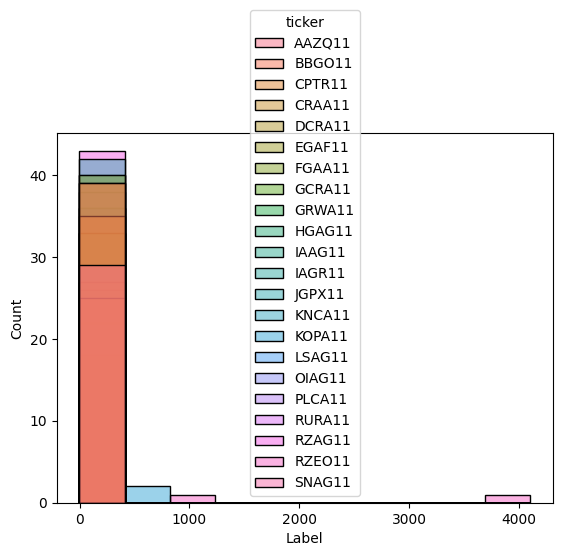

In [418]:
sns.histplot(x=marge_index['Label'],bins=10, hue=marge_index['ticker'])

In [419]:
cut_label = pd.qcut(marge_index['Label'],2)

<Axes: xlabel='Label'>

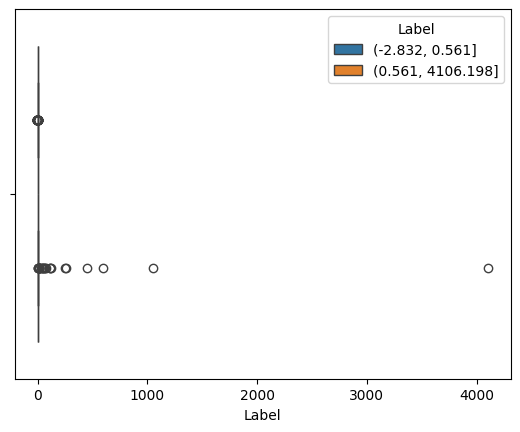

In [420]:
sns.boxplot(x=marge_index['Label'], hue=cut_label)

In [421]:
marge_index['Beta'].describe()

count    683.000000
mean       2.113208
std        3.809945
min       -8.500578
25%        0.227962
50%        1.043574
75%        4.517066
max       11.252650
Name: Beta, dtype: float64

In [422]:
marge_index.columns

Index(['ticker', 'Beta', 'Date', 'Open', 'drawdown', 'Label'], dtype='object')

In [423]:
rotulo = marge_index.drop(columns=['drawdown','Open','Beta'])

### Dados de Mudanças de preços

### Dados mensais

In [424]:
mensal = pd.read_csv('./../assets/mes_data.csv')

# mensal['Data da Informação sobre detalhamento do número de cotistas¹']
mensal['Data'] = pd.to_datetime(mensal['Data da Informação sobre detalhamento do número de cotistas¹'],dayfirst=True,errors='coerce')
mensal.drop(columns=['Data da Informação sobre detalhamento do número de cotistas¹'])

,Unnamed: 0,ticker,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30,2024.0-3.0
1,1,AAZQ,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30,2024.0-3.0
2,2,AAZQ,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31,2024.0-3.0
3,3,AAZQ,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28,2024.0-2.0
4,4,AAZQ,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31,2024.0-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29,2022.0-2.0
889,889,XPCA,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31,2022.0-1.0
890,890,XPCA,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25,2022.0-1.0
891,891,XPCA,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31,2022.0-1.0


# Fazer o rôtulo
Variação
Beta = Varição do ativo / Variação do indice
Rótulo = Beta * Variação * Resultado do próximo quarter(trimestre)

In [425]:
mensal['Ano_Quarter'] = mensal['Data'].dt.strftime('%Y') + '-' + mensal['Data'].dt.quarter.astype(str)
mensal['Ano_Quarter'] = mensal['Ano_Quarter'].str[:-2]
mensal['Ano_Quarter']


0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

### Remover colunas Unnamed de mensal e trmestral

In [426]:
mensal[mensal.isna()] = 0
mensal

/tmp/ipykernel_3357/3613130871.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  mensal[mensal.isna()] = 0


,Unnamed: 0,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30 00:00:00,2024-3
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30 00:00:00,2024-3
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31 00:00:00,2024-3
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28 00:00:00,2024-2
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31 00:00:00,2024-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29 00:00:00,2022-2
889,889,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31 00:00:00,2022-1
890,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25 00:00:00,2022-1
891,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31 00:00:00,2022-1


In [427]:
mensal['Dividend Yield do Mês de Referência³ (%)']

0      1.0926
1      1.0933
2      1.0945
3      1.1660
4      1.1655
        ...  
888    1.4666
889    1.4620
890    1.1514
891    1.0461
892    0.8371
Name: Dividend Yield do Mês de Referência³ (%), Length: 893, dtype: float64

In [428]:
# mensal.to_csv('../assets/mes_data.csv')
# for column in mensal.columns.tolist():
#     print(colum)
#     if colum not in ['Mount','Dividend Yield do Mês de Referência³ (%)']:
#         print(colum)
#         mensal[colum] = mensal[colum].astype(str).replace(".","").replace(',','.')
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [429]:
trimestre = pd.read_csv('../assets/dados1.csv')
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,8.653422e+09,-5.747045e+08,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.730684e+10,-1.730684e+09,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,8.653422e+10,-8.653422e+08,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.922983e+11,-1.922983e+08,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,7.430380e+09,-7.430380e+08,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [430]:
for i in trimestre.columns:
    print(i)

Unnamed: 0
NomedoFundo:
CNPJdoFundo:
DatadeFuncionamento:
PúblicoAlvo:
CódigoISIN:
Quantidadedecotasemitidas:
FundoExclusivo?
Cotistaspossuemvínculofamiliarousocietáriofamiliar?
Classificaçãoautorregulação:
PrazodeDuração:
DatadoPrazodeDuração:
Encerramentodoexercíciosocial:
Mercadodenegociaçãodascotas:
Entidadeadministradorademercadoorganizado:
NomedoAdministrador:
CNPJdoAdministrador:
Endereço:
Telefones:
Site:
E-mail:
Competência:
DatadeEncerramentodoTrimestre:
OFundoseenquadranadefiniçãodanota"6":
Resultadocontábil/financeirotrimestrallíquido_financeiro
Resultadocontábil/financeirotrimestrallíquido_contabil
(-)Taxadeadministração_financeiro
(-)Taxadeadministração_contabil
(-)Taxadedesempenho(performance)_financeiro
(-)Taxadedesempenho(performance)_contabil
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_financeiro
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_contabil
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro
(-)Empresaespecializadadequetrata

In [431]:
# trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
# trimestre['DatadeFuncionamento:'] = pd.to_datetime(trimestre['DatadeFuncionamento:'])
# trimestre.to_csv('../assets/dados1.csv')


In [432]:
str(trimestre['NomedoFundo:'].unique().tolist())

"['AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO', 'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO', 'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO', 'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO', 'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO', '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB', 'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO', 'INTERAMERRA-FIA

In [433]:
dict_nome_ticker= {
    'AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'AAZQ', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO': 'AGRX', 
    'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO': 'BBGO', 
    'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO': 'CPTR', 
    'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'CRAA', 
    'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'DCRA', 
    'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'EGAF', 
    'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'FGAA', 
    '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO': 'FLEM', 
    '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB': 'FZDA', 
    'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'GCRA', 
    'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'GRWA', 
    'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO': 'HGAG', 
    'INTERAMERRA-FIAGRO-IMOBILIÁRIO': 'IAAG', 
    'SFIINVESTIMENTOSDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'IAGR', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISJGPCRÉDITO-FIAGRO-IMOBILIÁRIO': 'JGPX', 
    'KINEACRÉDITOAGROFIAGRO-IMOBILIÁRIO': 'KNCA', 
    'KINEAOPORTUNIDADESAGROIFIAGRO-IMOBILIÁRIO': 'KOPA', 
    'LESTEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'KOPA', 
    'NCHRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'NCHEQIRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'OURINVESTINNOVATION-FIAGROIMOBILIÁRIO': 'OIAG', 
    'PLURALBRBCRÉDITOAGRO-FIAGRO-IMOBILIÁRIO': 'PLCA', 
    'ITAÚASSETRURALFIAGRO-IMOBILIÁRIO': 'RURA', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISRIZAAGRO-FIAGRO-IMOBILIÁRIO': 'RZAG', 
    'RIZAEOSFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIÁRIO': 'RZEO', 
    'SUNOAGRO-FIAGRO-IMOBILIÁRIO': 'SNAG', 
    'VECTISDATAGROCRÉDITOAGRONEGÓCIO-FINASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'VCRA', 
    'VALORACRAFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'VGIA', 
    'XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISIMOB.-FIAGRO-IMOB.': 'XPCA'
}

In [434]:
trimestre['ticker'] = trimestre['NomedoFundo:'].apply(lambda x: dict_nome_ticker.get(x))
trimestre['ticker'] 

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
307    XPCA
308    XPCA
309    XPCA
310    XPCA
311    XPCA
Name: ticker, Length: 312, dtype: object

In [435]:
mensal.ticker

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
888    XPCA
889    XPCA
890    XPCA
891    XPCA
892    XPCA
Name: ticker, Length: 893, dtype: object

In [436]:
trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
trimestre['Ano_Quarter'] = trimestre['DatadeEncerramentodoTrimestre:'].dt.year.astype(str) + "-" + trimestre['DatadeEncerramentodoTrimestre:'].dt.quarter.astype(str) 
# mensal['Ano_Quarter']
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN,ticker,Ano_Quarter
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,AAZQ,2024-2
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0,AAZQ,2024-1
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0,AAZQ,2023-4
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0,AAZQ,2023-3
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0,AAZQ,2023-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0,XPCA,2022-3
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0,XPCA,2022-2
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\nSegmentode...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1


In [437]:
trimestre['Ano_Quarter']

0      2024-2
1      2024-1
2      2023-4
3      2023-3
4      2023-2
        ...  
307    2022-3
308    2022-2
309    2022-1
310    2022-1
311    2021-4
Name: Ano_Quarter, Length: 312, dtype: object

In [438]:
mensal['Ano_Quarter']

0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

In [439]:
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [440]:
def convert_to_numeric(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        try:
            df[column] = df[column].astype(str)
            df[column] = df[column].str.replace("%", "")
            df[column] = df[column].str.replace(".", "")
            df[column] = df[column].str.replace(",", ".")
            df[column] = pd.to_numeric(df[column], errors='raise')
            print(f"Converted column {column} to numeric.")
        except Exception as e:
            print(f"Error converting column {column}: {e}")
    return df

In [441]:
mensal = convert_to_numeric(mensal, mensal.columns.tolist())

Converted column Unnamed: 0 to numeric.
Error converting column ticker: Unable to parse string "AAZQ" at position 0
Error converting column Data da Informação sobre detalhamento do número de cotistas¹: Unable to parse string "30/09/2024" at position 0
Converted column Número de cotistas to numeric.
Converted column Pessoa física to numeric.
Converted column Pessoa jurídica não financeira to numeric.
Converted column Banco comercial to numeric.
Converted column Corretora ou distribuidora to numeric.
Converted column Outras pessoas jurídicas financeiras to numeric.
Converted column Investidores não residentes to numeric.
Converted column Entidade aberta de previdência complementar to numeric.
Converted column Entidade fechada de previdência complementar to numeric.
Converted column Regime próprio de previdência dos servidores públicos to numeric.
Converted column Sociedade seguradora ou resseguradora to numeric.
Converted column Sociedade de capitalização e de arrendamento mercantil to n

In [442]:
mensal.dtypes

Unnamed: 0                                                        int64
ticker                                                           object
Data da Informação sobre detalhamento do número de cotistas¹     object
Número de cotistas                                                int64
Pessoa física                                                     int64
                                                                 ...   
Total do passivo                                                float64
Certificado de Recebíveis Imobiliários (CRI)                    float64
Letras de Crédito Imobiliário (LCI)                             float64
Data                                                             object
Ano_Quarter                                                      object
Length: 88, dtype: object

In [443]:
final = pd.merge(mensal,trimestre,'left',on=['Ano_Quarter','ticker'])
final

,Unnamed: 0_x,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
4,4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,890,XPCA,25/02/2022,5386,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1067,890,XPCA,25/02/2022,5386,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1068,891,XPCA,31/01/2022,4546,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1069,891,XPCA,31/01/2022,4546,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [444]:
final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')
final['Date'] = final_date.dt.to_period('M')
final['Date']

/tmp/ipykernel_3357/2064336292.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')


0       2024-09
1       2024-08
2       2024-07
3       2024-06
4       2024-05
         ...   
1066    2022-02
1067    2022-02
1068    2022-01
1069    2022-01
1070    2021-12
Name: Date, Length: 1071, dtype: period[M]

In [445]:
columns_to_drop = list(filter(lambda column: 'Unnamed' in column,final.columns))
columns_to_drop.append('NaN')
columns_to_drop.append('0')
final = final.drop(columns=columns_to_drop)
final


,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [446]:
final.drop_duplicates(subset=['ticker','Date'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8496,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6546,6498,470,0,0,0,10,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [447]:
final.to_csv('../assets/final.csv')

In [448]:
final.shape

(1071, 204)

In [449]:
final[final.isna()] = 0

/tmp/ipykernel_3357/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0
/tmp/ipykernel_3357/3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0


In [450]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [451]:
final.drop_duplicates(subset=['ticker','Data da Informação sobre detalhamento do número de cotistas¹'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8496,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6546,6498,470,0,0,0,10,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


Juntar final com label

In [452]:
final.columns 

Index(['ticker',
       'Data da Informação sobre detalhamento do número de cotistas¹',
       'Número de cotistas', 'Pessoa física', 'Pessoa jurídica não financeira',
       'Banco comercial', 'Corretora ou distribuidora',
       'Outras pessoas jurídicas financeiras', 'Investidores não residentes',
       'Entidade aberta de previdência complementar',
       ...
       ' (+) Resultado financeiro que excede o mínimo de 95%⁷.',
       ' Rendimentos declarados',
       ' (-) Rendimentos pagos antecipadamente durante o trimestre/semestre',
       ' Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre',
       ' % do resultado financeiro líquido declarado no trimestre/semestre',
       ' Resultado financeiro líquido acumulado no trimestre/semestre corrente',
       ' 95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)',
       ' (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.',
       ' (-) Parce

In [453]:
final['ticker'] = final['ticker'] + '11'

In [454]:
len(rotulo['ticker'].unique())

22

In [455]:
rotulo

,ticker,Date,Label
0,AAZQ11,2022-12,0.081386
1,AAZQ11,2023-01,0.088611
2,AAZQ11,2023-02,0.086668
3,AAZQ11,2023-03,0.066115
4,AAZQ11,2023-04,0.070130
...,...,...,...
682,SNAG11,2024-12,0.752329
683,SNAG11,2025-01,0.704825
684,SNAG11,2025-02,0.693393
685,SNAG11,2025-03,0.688831


In [456]:
final['ticker'] , rotulo['ticker']

(0       AAZQ11
 1       AAZQ11
 2       AAZQ11
 3       AAZQ11
 4       AAZQ11
          ...  
 1066    XPCA11
 1067    XPCA11
 1068    XPCA11
 1069    XPCA11
 1070    XPCA11
 Name: ticker, Length: 1071, dtype: object,
 0      AAZQ11
 1      AAZQ11
 2      AAZQ11
 3      AAZQ11
 4      AAZQ11
         ...  
 682    SNAG11
 683    SNAG11
 684    SNAG11
 685    SNAG11
 686    SNAG11
 Name: ticker, Length: 683, dtype: object)

In [457]:
final['Date'] = final['Date'].astype(str)
rotulo['Date'] = rotulo['Date'].astype(str)

final = pd.merge(final, rotulo, 'left', on=['Date', 'ticker'])
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100874
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.079165
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124679
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.229369
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1067,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN
1069,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


In [458]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100874
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.079165
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124679
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.229369
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1067,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN
1069,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


In [459]:
final['Label'].unique()

array([ 1.00873745e-01,  7.91648020e-02,  1.24679362e-01,  2.29369217e-01,
        8.26072150e-02,  6.02383932e-02,  6.47197198e-02,  6.44603102e-02,
        7.33578126e-02,  8.17461882e-02,  6.30411076e-02,  6.54226718e-02,
        6.46067210e-02,  6.34857436e-02,  7.22594558e-02,  6.65943545e-02,
        6.54141937e-02,  7.01298862e-02,  6.61152153e-02,  8.66680226e-02,
        8.86111937e-02,  8.13857846e-02,             nan,  4.07705450e+00,
        2.90528844e+00,  2.57415902e+00,  2.84061690e+00,  2.43381633e+00,
        2.45822187e+00,  2.46759493e+00,  2.50747153e+00,  2.49540336e+00,
        2.59154605e+00,  2.49378280e+00,  2.71966061e+00,  2.46097428e+00,
        2.51546881e+00,  2.58409177e+00,  2.80518968e+00,  3.16605933e+00,
        2.47723765e+00,  2.40962707e+00,  2.42690085e+00,  2.44735855e+00,
        3.24512373e+00,  2.44595230e+00,  2.40350846e+00,  2.57346955e+00,
        2.52889735e+00,  2.66612862e+00,  2.45272412e+00,  2.55255204e+00,
        2.69578637e+00,  

Removendo duplicacatas

In [460]:
Unnamed_column = filter(lambda column: 'Unnamed' in column, final.columns)
final = final.drop(columns=Unnamed_column)
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100874
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.079165
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124679
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.229369
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1067,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN
1069,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


In [461]:
final = final.drop_duplicates(subset=['Data da Informação sobre detalhamento do número de cotistas¹','ticker'])
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100874
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.079165
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124679
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.229369
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA11,29/04/2022,8496,0,0,0,0,0,0,0,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04,NaN
1064,XPCA11,31/03/2022,6546,6498,470,0,0,0,10,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03,NaN
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


Removendo dados categoricos

In [462]:
final = final.select_dtypes(include=['number'])
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30136,3008,460,0,0,40,50,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.100874
1,29754,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.079165
2,2943,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.124679
3,27954,27899,480,0,0,0,60,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.229369
4,28223,0,0,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,8496,0,0,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,NaN
1064,6546,6498,470,0,0,0,10,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1066,5386,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1068,4546,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN


In [463]:
size = len(final)
size

796

In [464]:
final['Label'].describe()

count     524.000000
mean       11.497505
std       185.177303
min        -2.831189
25%         0.162787
50%         0.532387
75%         1.667043
max      4106.197950
Name: Label, dtype: float64

In [465]:
def remove_outliers(df, coluna):
    # Calcula os quartis
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Define os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra os dados que estão dentro dos limites
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    return df_filtrado

# final = remove_outliers(final, 'Label')
# print("Dados originais:")
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30136,3008,460,0,0,40,50,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.100874
1,29754,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.079165
2,2943,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.124679
3,27954,27899,480,0,0,0,60,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.229369
4,28223,0,0,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,8496,0,0,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,NaN
1064,6546,6498,470,0,0,0,10,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1066,5386,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1068,4546,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN


In [466]:
final = final.select_dtypes(include=['number'])
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30136,3008,460,0,0,40,50,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.100874
1,29754,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.079165
2,2943,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.124679
3,27954,27899,480,0,0,0,60,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.229369
4,28223,0,0,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.082607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,8496,0,0,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,NaN
1064,6546,6498,470,0,0,0,10,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1066,5386,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1068,4546,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN


<Axes: >

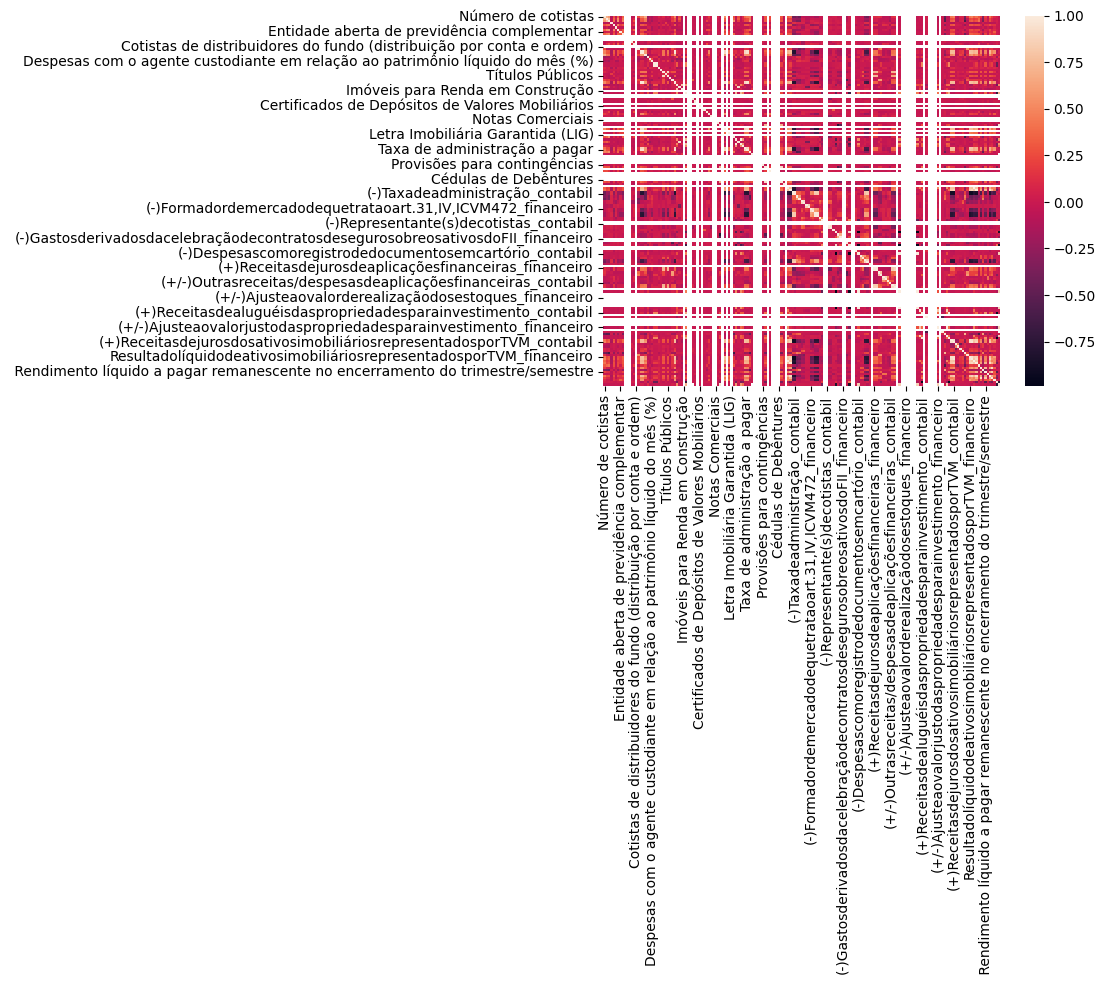

In [467]:
corr = final.corr('pearson')
sns.heatmap(data=corr)

Tentando ver as variaveis que mais interefem no label

In [468]:
corr['Label'].describe()

count    126.000000
mean       0.043108
std        0.272341
min       -0.849854
25%       -0.020319
50%       -0.007468
75%        0.012530
max        1.000000
Name: Label, dtype: float64

In [469]:
corr.loc[(corr['Label'] < -0.3) | (corr['Label'] > 0.3)]['Label']

Direitos reais sobre bens imóveis                                                                        0.528031
Imóveis para Venda Acabados                                                                              0.695892
Cotas de Sociedades que se enquadre entre as atividades permitidas aos FII                               0.970226
Valores a Receber                                                                                        0.586750
Contas a Receber por Venda de Imóveis                                                                    0.577113
Outros Valores a Receber                                                                                 0.393242
(-)Auditoriaindependente_contabil                                                                       -0.398869
(-)ComissõeseemolumentospagossobreasoperaçõesdoFII_contabil                                             -0.842978
(-)Despesascomavaliaçõesobrigatórias_contabil                                           

In [470]:
corr.loc[(corr['Dividend Yield do Mês de Referência³ (%)'].abs() > 0.3)]['Dividend Yield do Mês de Referência³ (%)']

Dividend Yield do Mês de Referência³ (%)    1.0
Name: Dividend Yield do Mês de Referência³ (%), dtype: float64

In [471]:
corr.loc[(corr[' % do resultado financeiro líquido declarado no trimestre/semestre'] < -0.3) | (corr[' % do resultado financeiro líquido declarado no trimestre/semestre'] > 0.3)][' % do resultado financeiro líquido declarado no trimestre/semestre']

(+/-)Resultadonavendadeaplicaçõesfinanceiras_financeiro               0.406628
(+/-)Resultadonavendadeaplicaçõesfinanceiras_contabil                 0.397611
 % do resultado financeiro líquido declarado no trimestre/semestre    1.000000
Name:  % do resultado financeiro líquido declarado no trimestre/semestre, dtype: float64

In [472]:
corr.loc[corr['Ativo – R$'].abs() > 0.3]['Ativo – R$']

Número de cotistas                                                                                          0.489264
Pessoa física                                                                                               0.305921
Corretora ou distribuidora                                                                                  0.315315
Entidade fechada de previdência complementar                                                                0.348276
Ativo – R$                                                                                                  1.000000
Patrimônio Líquido – R$                                                                                     0.997198
Número de Cotas Emitidas                                                                                    0.608823
Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)                              0.417093
Títulos Públicos                                                

In [473]:
corr.columns.tolist()

['Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquido do mês (%)',
 'Rentabilidade Efetiva Mensal (%)',
 'Rentabilidade Patrimonial do Mês de R

In [474]:
interval = [final['Label'].min(),final['Label'].quantile(.33),final['Label'].quantile(.66),final['Label'].max()]
labels = ['low_risk','medium_risk','hight_risk']

<Axes: xlabel='Label', ylabel='Count'>

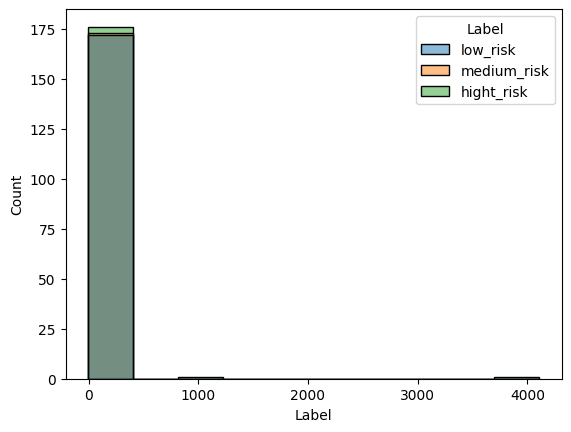

In [476]:
hue = pd.cut(final['Label'],bins=interval,labels=labels)
sns.histplot(x=final['Label'], hue=hue, bins=10)

In [477]:
final['label'] = hue

### RFE

In [478]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

final =final.dropna()
# Carregando um dataset de exemplo
X = final.drop(columns=['label'])
y = final['label']

# Definindo o modelo base (pode ser qualquer estimador com coef_ ou feature_importances_)
modelo = LogisticRegression(max_iter=200)

# Criando o RFE - selecionando 2 features
rfe = RFE(estimator=modelo, n_features_to_select=15)

# Fitando o RFE nos dados
rfe.fit(X, y)

# Verificando as features selecionadas
print("Features selecionadas:", rfe.support_)
print("Ranking das features:", rfe.ranking_)


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Features selecionadas: [False False False False False False False False False False False False
 False False False False  True False  True False False False False False
 False False  True False False False False  True  True  True  True False
  True False False False False False False False False  True False False
 False False False False False False False  True False False  True False
  True False False False False False False False False False False  True
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False Fal

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [479]:
dict_rfe = {}
for i in range(len(rfe.support_)):
    dict_rfe[final.columns[i]] = int(rfe.ranking_[i])
dict_rfe

{'Número de cotistas': 74,
 'Pessoa física': 79,
 'Pessoa jurídica não financeira': 97,
 'Banco comercial': 102,
 'Corretora ou distribuidora': 103,
 'Outras pessoas jurídicas financeiras': 99,
 'Investidores não residentes': 104,
 'Entidade aberta de previdência complementar': 106,
 'Entidade fechada de previdência complementar': 109,
 'Regime próprio de previdência dos servidores públicos': 157,
 'Sociedade seguradora ou resseguradora': 159,
 'Sociedade de capitalização e de arrendamento mercantil': 158,
 'Fundos de investimento imobiliário': 101,
 'Outros fundos de investimento': 100,
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)': 160,
 'Outros tipos de cotistas não relacionados': 81,
 'Ativo – R$': 1,
 'Patrimônio Líquido – R$': 10,
 'Número de Cotas Emitidas': 1,
 'Valor Patrimonial das Cotas – R$': 98,
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)': 110,
 'Despesas com o agente custodiante em relação ao patrimônio líq

In [480]:
dict(sorted(dict_rfe.items(), key=lambda item: item[1]))

{'Ativo – R$': 1,
 'Número de Cotas Emitidas': 1,
 'Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)': 1,
 'Total investido': 1,
 'Direitos reais sobre bens imóveis': 1,
 'Terrenos': 1,
 'Imóveis para Renda Acabados': 1,
 'Imóveis para Venda Acabados': 1,
 'Fundo de Investimento Imobiliário (FII)': 1,
 'Letras de Crédito Imobiliário "LCI" (se FIAGRO, Letras de Crédito do Agronegócio "LCA")': 1,
 'Valores a Receber': 1,
 'Contas a Receber por Venda de Imóveis': 1,
 'Outros valores a pagar': 1,
 'Resultadocontábil/financeirotrimestrallíquido_financeiro': 1,
 '(+/-)AjusteaovalorjustodosativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 'ResultadolíquidodeativosimobiliáriosrepresentadosporTVM_financeiro': 2,
 'Total do passivo': 3,
 'Resultadolíquidodosativosimobiliários_financeiro': 4,
 ' (-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º)': 5,
 'Resultadocontábil/financeirotrimestrallíquido_contabil': 6,
 

### Discretizar os Dados

In [482]:
discretized = pd.DataFrame()
for colum in final.columns:
    if colum != 'Label':
        discretized[colum] = pd.qcut(final[colum],q=6, duplicates='drop')
discretized['Label'] = final['Label']
discretized

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,"(12574.0, 31481.0]","(1934.0, 7140.0]","(400.0, 1750.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(10.0, 70.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(-0.001, 9926364.0]","(-0.001, 1871583836.0]","(-22839184.0, 0.0]","(-45.001, 0.0]","(-0.001, 963114.0]","(-1287441.001, 0.0]","(-0.001, 2740114735.0]","(-0.001, 871213.0]","(-821046162.001, 0.0]",low_risk
1,"(12574.0, 31481.0]","(-0.001, 1934.0]","(-0.001, 40.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(-0.001, 9926364.0]","(-0.001, 1871583836.0]","(-22839184.0, 0.0]","(-45.001, 0.0]","(-0.001, 963114.0]","(-1287441.001, 0.0]","(-0.001, 2740114735.0]","(-0.001, 871213.0]","(-821046162.001, 0.0]",low_risk
2,"(1563.0, 3485.0]","(-0.001, 1934.0]","(-0.001, 40.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(-0.001, 9926364.0]","(-0.001, 1871583836.0]","(-22839184.0, 0.0]","(-45.001, 0.0]","(-0.001, 963114.0]","(-1287441.001, 0.0]","(-0.001, 2740114735.0]","(-0.001, 871213.0]","(-821046162.001, 0.0]",low_risk
3,"(12574.0, 31481.0]","(13264.0, 108945.0]","(400.0, 1750.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(10.0, 70.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(46140918.0, 133812727.0]","(10860870465.0, 28909286105.0]","(-1646568575.0, -475198218.0]","(1199999999.0, 5999950905.0]","(963114.0, 1000000.0]","(948896028.0, 2316649015.0]","(12740355171.0, 27693167812.0]","(-0.001, 871213.0]","(-821046162.001, 0.0]",medium_risk
4,"(12574.0, 31481.0]","(-0.001, 1934.0]","(-0.001, 40.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(46140918.0, 133812727.0]","(10860870465.0, 28909286105.0]","(-1646568575.0, -475198218.0]","(1199999999.0, 5999950905.0]","(963114.0, 1000000.0]","(948896028.0, 2316649015.0]","(12740355171.0, 27693167812.0]","(-0.001, 871213.0]","(-821046162.001, 0.0]",low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,"(31481.0, 106042.0]","(13264.0, 108945.0]","(130.0, 400.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(9926364.0, 46140918.0]","(100648536695.0, 1062597405635.0]","(-22839184.0, 0.0]","(30360843135.0, 246239076605.0]","(-0.001, 963114.0]","(948896028.0, 2316649015.0]","(95885767365.0, 985291255975.0]","(-0.001, 871213.0]","(-821046162.001, 0.0]",medium_risk
931,"(12574.0, 31481.0]","(13264.0, 108945.0]","(130.0, 400.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(9926364.0, 46140918.0]","(1871583836.0, 10860870465.0]","(-22839184.0, 0.0]","(1199999999.0, 5999950905.0]","(963114.0, 1000000.0]","(355458249.0, 948896028.0]","(2740114735.0, 12740355171.0]","(-0.001, 871213.0]","(-821046162.001, 0.0]",medium_risk
933,"(12574.0, 31481.0]","(13264.0, 108945.0]","(130.0, 400.0]","(-0.001, 20.0]","(-0.001, 

In [484]:
from sklearn.preprocessing import MinMaxScaler

normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col != 'Label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = final[col]  # mantém o label
normalized

/tmp/ipykernel_3357/3756603159.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3357/3756603159.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3357/3756603159.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,0.284122,0.027610,0.262857,0.0,0.0,0.070175,0.714286,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
1,0.280519,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
2,0.027661,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
3,0.263543,0.256083,0.274286,0.0,0.0,0.000000,0.857143,0.0,0.0,0.0,...,0.004877,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,medium_risk
4,0.266080,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.004877,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.329448,0.320363,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.001156,0.097685,0.999974,1.461994e-01,0.040792,0.083075,0.103915,0.0,1.0,low_risk
519,0.242031,0.235275,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.003328,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,low_risk
520,0.218679,0.212594,0.194286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.003328,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,hight_risk
521,0.141570,0.137629,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.002450,0.999997,6.918983e-03,0.040236,0.021200,0.002643,0.0,1.0,hight_risk


# SVM

Separar treinamento teste

In [486]:
from sklearn.model_selection import train_test_split
normalized = normalized.dropna()
X = normalized.drop(columns=['Label'])
y = normalized['Label']
X = X.loc[:,rfe.support_]
# Separação: 70% treino, 30% teste (pode ajustar o test_size se quiser)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

normalized

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,0.284122,0.027610,0.262857,0.0,0.0,0.070175,0.714286,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
1,0.280519,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
2,0.027661,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
3,0.263543,0.256083,0.274286,0.0,0.0,0.000000,0.857143,0.0,0.0,0.0,...,0.004877,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,medium_risk
4,0.266080,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.004877,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.329448,0.320363,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.001156,0.097685,0.999974,1.461994e-01,0.040792,0.083075,0.103915,0.0,1.0,low_risk
519,0.242031,0.235275,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.003328,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,low_risk
520,0.218679,0.212594,0.194286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.003328,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,hight_risk
521,0.141570,0.137629,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.002450,0.999997,6.918983e-03,0.040236,0.021200,0.002643,0.0,1.0,hight_risk


In [487]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
cs = [.5,1,10]
kernels = ['poly','rbf']
for c in cs:
    for kernel in kernels:
        svc = SVC(kernel=kernel,C=c,probability=True, decision_function_shape='ovo', random_state=0)
        svc.fit(X=X_train,y=y_train)
        y_predict = svc.predict(X=X_test)
        print(f'C:{c}, kernel: {kernel}')
        # print(f'Acuracia: {accuracy_score(y_true=y_test,y_pred=y_predict)}')
        print(confusion_matrix(y_true=y_test,y_pred=y_predict))
        print(classification_report(y_test, y_predict))
        print('------------------------------------------------------')
        
        


C:0.5, kernel: poly
[[28  1  0]
 [12 30  0]
 [10  2  0]]
              precision    recall  f1-score   support

  hight_risk       0.56      0.97      0.71        29
    low_risk       0.91      0.71      0.80        42
 medium_risk       0.00      0.00      0.00        12

    accuracy                           0.70        83
   macro avg       0.49      0.56      0.50        83
weighted avg       0.66      0.70      0.65        83

------------------------------------------------------
C:0.5, kernel: rbf
[[25  4  0]
 [ 8 34  0]
 [ 8  4  0]]
              precision    recall  f1-score   support

  hight_risk       0.61      0.86      0.71        29
    low_risk       0.81      0.81      0.81        42
 medium_risk       0.00      0.00      0.00        12

    accuracy                           0.71        83
   macro avg       0.47      0.56      0.51        83
weighted avg       0.62      0.71      0.66        83

------------------------------------------------------
C:1, kernel: po

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

              precision    recall  f1-score   support

  hight_risk       0.56      0.97      0.71        29
    low_risk       0.94      0.74      0.83        42
 medium_risk       0.00      0.00      0.00        12

    accuracy                           0.71        83
   macro avg       0.50      0.57      0.51        83
weighted avg       0.67      0.71      0.67        83

------------------------------------------------------
C:1, kernel: rbf
[[27  2  0]
 [ 8 34  0]
 [ 9  3  0]]
              precision    recall  f1-score   support

  hight_risk       0.61      0.93      0.74        29
    low_risk       0.87      0.81      0.84        42
 medium_risk       0.00      0.00      0.00        12

    accuracy                           0.73        83
   macro avg       0.50      0.58      0.53        83
weighted avg       0.66      0.73      0.68        83

------------------------------------------------------
C:10, kernel: poly
[[28  1  0]
 [10 31  1]
 [10  2  0]]
              prec

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [489]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalização dos dados
normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col != 'Label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = final[col]  # mantém o Label

# Removendo NaN
normalized = normalized.dropna()

# Separação de X e y
X = normalized.drop(columns=['Label'])
y = normalized['Label']

# Aplicando RFE para seleção de features
modelo = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=modelo, n_features_to_select=15)
rfe.fit(X, y)

# Filtrando as features selecionadas
X = X.loc[:, rfe.support_]

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_train, y_train)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    print(f"Random Forest (n_estimators={n_estimator}) - Matriz de Confusão:")
    print(confusion_matrix(y_test, y_predict_rf))

    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))

    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))
# Aplicando Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

# Avaliação do modelo Random Forest
print("Random Forest - Matriz de Confusão:")
print(confusion_matrix(y_test, y_predict_rf))

print("\nRandom Forest - Acurácia:")
print(accuracy_score(y_test, y_predict_rf))

print("\nRandom Forest - Relatório de Classificação:")
print(classification_report(y_test, y_predict_rf))


/tmp/ipykernel_3357/356378216.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3357/356378216.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
/tmp/ipykernel_3357/356378216.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

Random Forest (n_estimators=10) - Matriz de Confusão:
[[28  0  1]
 [ 1 41  0]
 [ 3  2  7]]

Random Forest - Acurácia:
0.9156626506024096

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.88      0.97      0.92        29
    low_risk       0.95      0.98      0.96        42
 medium_risk       0.88      0.58      0.70        12

    accuracy                           0.92        83
   macro avg       0.90      0.84      0.86        83
weighted avg       0.91      0.92      0.91        83

Random Forest (n_estimators=100) - Matriz de Confusão:
[[28  1  0]
 [ 2 40  0]
 [ 3  2  7]]

Random Forest - Acurácia:
0.9036144578313253

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.85      0.97      0.90        29
    low_risk       0.93      0.95      0.94        42
 medium_risk       1.00      0.58      0.74        12

    accuracy                        

In [494]:
y_train.value_counts()

Label
low_risk       98
hight_risk     66
medium_risk    28
Name: count, dtype: int64

In [495]:
# Install the required library
%pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Aplicar o SMOTE para balancear as classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Rodar o Random Forest novamente
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_resampled, y_resampled)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    print(f"Random Forest (n_estimators={n_estimator}) - Matriz de Confusão:")
    print(confusion_matrix(y_test, y_predict_rf))

    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))

    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Random Forest (n_estimators=10) - Matriz de Confusão:
[[28  0  1]
 [ 2 39  1]
 [ 3  2  7]]

Random Forest - Acurácia:
0.891566265060241

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.85      0.97      0.90        29
    low_risk       0.95      0.93      0.94        42
 medium_risk       0.78      0.58      0.67        12

    accuracy                           0.89        83
   macro avg       0.86      0.83      0.84        83
weighted avg       0.89      0.89      0.89        83

Random Forest (n_estimators=10) - Matriz de Confusão:
[[28  0  1]
 [ 2 39  1]
 [ 3  2  7]]

Random Forest - Acurácia:
0.891566265060241

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.85      0.97      0.90        29
    low_risk    

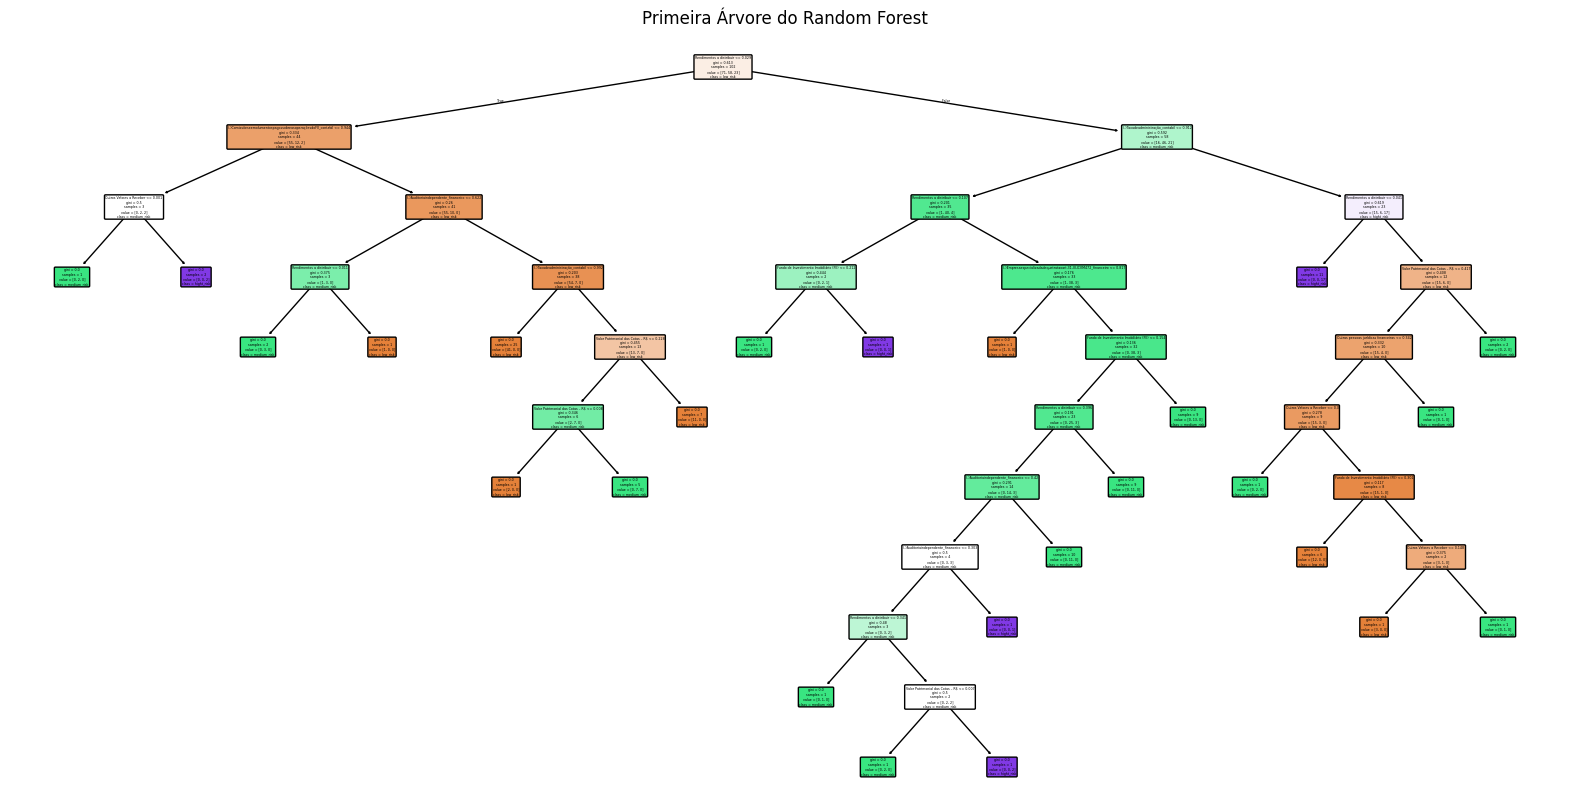

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Acessar a primeira árvore do Random Forest
first_tree = rf.estimators_[0]

# Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(first_tree, feature_names=X.columns, class_names=y.cat.categories, filled=True, rounded=True)
plt.title("Primeira Árvore do Random Forest")
plt.show()

# RNA

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Modelo com duas camadas intermediárias utilizando ReLU.
model_relu = Sequential([
    Dense(64, input_dim=15),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax')
])

model_relu.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_relu.summary()


2025-04-18 02:59:04.112422: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 02:59:05.091116: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-18 02:59:05.570215: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744955946.090317    3357 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744955946.233846    3357 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744955947.458408    3357 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,203 (12.51 KB)

 Trainable params: 3,203 (12.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train.dtypes
# y_train.dtypes

Corretora ou distribuidora                                                    float64
Outras pessoas jurídicas financeiras                                          float64
Outros fundos de investimento                                                 float64
Valor Patrimonial das Cotas – R$                                              float64
Fundo de Investimento Imobiliário (FII)                                       float64
Outros Valores a Receber                                                      float64
Rendimentos a distribuir                                                      float64
Resultadocontábil/financeirotrimestrallíquido_contabil                        float64
(-)Taxadeadministração_financeiro                                             float64
(-)Taxadeadministração_contabil                                               float64
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro               float64
(-)Auditoriaindependente_financeiro                   

In [ ]:
# Convert categorical labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train.cat.codes, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test.cat.codes, num_classes=3)

# Train the model
model_relu.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Avaliação do modelo
y_predict_relu = model_relu.predict(X_test)
y_predict_relu = tf.argmax(y_predict_relu, axis=1)
y_test_decoded = tf.argmax(y_test_encoded, axis=1)



Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3586 - loss: 1.0930
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4660 - loss: 1.0471 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4529 - loss: 1.0145
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4880 - loss: 0.9807
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4325 - loss: 0.9915
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4479 - loss: 0.9847
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6563 - loss: 0.9348
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7003 - loss: 0.9409
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6956 - loss: 0.9421
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7316 - loss: 0.9058 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
print("Modelo ReLU - Matriz de Confusão:")
print(confusion_matrix(y_test_decoded, y_predict_relu))
print(classification_report(y_test_decoded, y_predict_relu))

Modelo ReLU - Matriz de Confusão:
[[24  0  4]
 [ 3  0  8]
 [ 2  0 25]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.00      0.00      0.00        11
           2       0.68      0.93      0.78        27

    accuracy                           0.74        66
   macro avg       0.50      0.59      0.54        66
weighted avg       0.63      0.74      0.68        66



/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Configurações para testar
num_layers_options = [1, 2, 3]  # Número de camadas ocultas
neurons_per_layer_options = [16, 32, 64]  # Número de neurônios por camada
activation_functions = ['relu', 'tanh', 'sigmoid']  # Funções de ativação
output_activation = 'softmax'  # Função de ativação da camada de saída
learning_rate = 0.001  # Taxa de aprendizado
epochs = 50  # Número máximo de épocas
batch_size = 32  # Tamanho do lote

# Early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Loop para testar diferentes configurações
for num_layers in num_layers_options:
    for neurons in neurons_per_layer_options:
        for activation in activation_functions:
            print(f"Testing configuration: {num_layers} layers, {neurons} neurons/layer, {activation} activation")

            # Construção do modelo
            model = Sequential()
            model.add(Dense(neurons, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            for _ in range(num_layers - 1):
                model.add(Dense(neurons))
                model.add(Activation(activation))
            model.add(Dense(3))  # 3 classes de saída
            model.add(Activation(output_activation))

            # Compilação do modelo
            model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # Treinamento do modelo
            model.fit(X_train, y_train_encoded,
                      validation_data=(X_test, y_test_encoded),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping],
                      verbose=0)

            # Avaliação do modelo
            y_predict = model.predict(X_test)
            y_predict_classes = np.argmax(y_predict, axis=1)
            y_test_classes = np.argmax(y_test_encoded, axis=1)

            print("Confusion Matrix:")
            print(confusion_matrix(y_test_classes, y_predict_classes))
            print("Classification Report:")
            print(classification_report(y_test_classes, y_predict_classes))
            print("------------------------------------------------------")

Testing configuration: 1 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix:
[[21  0  7]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.00      0.00      0.00        11
           2       0.63      1.00      0.77        27

    accuracy                           0.73        66
   macro avg       0.51      0.58      0.53        66
weighted avg       0.64      0.73      0.66        66

------------------------------------------------------
Testing configuration: 1 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x78ead016aca0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[21  0  7]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1    

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[24  0  4]
 [ 2  0  9]
 [ 2  0 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.00      0.00      0.00        11
           2       0.66      0.93      0.77        27

    accuracy                           0.74        66
   macro avg       0.51      0.59      0.54        66
weighted avg       0.63      0.74      0.68        66

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 2  0 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.00      0.00      0.00        11
           2       0.64      0.93      0.76        27

    accuracy                           0.73        66
   macro avg       0.50      0.58      0.53        66
weighted avg       0.62      0.73      0.66        66

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:
[[22  0  6]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.00      0.00      0.00        11
           2       0.64      1.00      0.78        27

    accuracy                           0.74        66
   macro avg       0.52      0.60      0.54        66
weighted avg       0.65      0.74      0.68        66

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Confusion Matrix:
[[20  0  8]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.00      0.00      0.00        11
           2       0.61      1.00      0.76        27

    accuracy                           0.71        66
   macro avg       0.51      0.57      0.52        66
weighted avg       0.64      0.71      0.65        66

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Confusion Matrix:
[[23  0  5]
 [ 3  0  8]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.00      0.00      0.00        11
           2       0.68      1.00      0.81        27

    accuracy                           0.76        66
   macro avg       0.52      0.61      0.55        66
weighted avg       0.65      0.76      0.69        66

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Confusion Matrix:
[[28  0  0]
 [11  0  0]
 [24  0  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        28
           1       0.00      0.00      0.00        11
           2       1.00      0.11      0.20        27

    accuracy                           0.47        66
   macro avg       0.48      0.37      0.27        66
weighted avg       0.60      0.47      0.34        66

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[24  0  4]
 [ 4  0  7]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.00      0.00      0.00        11
           2       0.71      1.00      0.83        27

    accuracy                           0.77        66
   macro avg       0.52      0.62      0.56        66
weighted avg       0.65      0.77      0.70        66

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Confusion Matrix:
[[23  2  3]
 [ 4  4  3]
 [ 0  1 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.57      0.36      0.44        11
           2       0.81      0.96      0.88        27

    accuracy                           0.80        66
   macro avg       0.75      0.72      0.72        66
weighted avg       0.79      0.80      0.79        66

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Confusion Matrix:
[[22  0  6]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.00      0.00      0.00        11
           2       0.64      1.00      0.78        27

    accuracy                           0.74        66
   macro avg       0.52      0.60      0.54        66
weighted avg       0.65      0.74      0.68        66

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[25  0  3]
 [ 4  2  5]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       1.00      0.18      0.31        11
           2       0.77      1.00      0.87        27

    accuracy                           0.82        66
   macro avg       0.88      0.69      0.69        66
weighted avg       0.85      0.82      0.78        66

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  6  3]
 [ 0  1 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.60      0.55      0.57        11
           2       0.87      0.96      0.91        27

    accuracy                           0.85        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.85      0.85      0.85        66

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[22  0  6]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.00      0.00      0.00        11
           2       0.64      1.00      0.78        27

    accuracy                           0.74        66
   macro avg       0.52      0.60      0.54        66
weighted avg       0.65      0.74      0.68        66

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[24  0  4]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.00      0.00      0.00        11
           2       0.68      1.00      0.81        27

    accuracy                           0.77        66
   macro avg       0.53      0.62      0.56        66
weighted avg       0.67      0.77      0.71        66

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix:
[[28  0  0]
 [11  0  0]
 [27  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.60        28
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27

    accuracy                           0.42        66
   macro avg       0.14      0.33      0.20        66
weighted avg       0.18      0.42      0.25        66

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[27  0  1]
 [ 7  0  4]
 [ 1  0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        28
           1       0.00      0.00      0.00        11
           2       0.84      0.96      0.90        27

    accuracy                           0.80        66
   macro avg       0.54      0.64      0.58        66
weighted avg       0.67      0.80      0.73        66

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  8  1]
 [ 0  1 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.67      0.73      0.70        11
           2       0.93      0.96      0.95        27

    accuracy                           0.88        66
   macro avg       0.84      0.85      0.84        66
weighted avg       0.88      0.88      0.88        66

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[ 0  0 28]
 [ 0  0 11]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        11
           2       0.41      1.00      0.58        27

    accuracy                           0.41        66
   macro avg       0.14      0.33      0.19        66
weighted avg       0.17      0.41      0.24        66

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  8  1]
 [ 0  2 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.62      0.73      0.67        11
           2       0.93      0.93      0.93        27

    accuracy                           0.86        66
   macro avg       0.82      0.84      0.83        66
weighted avg       0.87      0.86      0.87        66

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  8  1]
 [ 0  2 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.62      0.73      0.67        11
           2       0.93      0.93      0.93        27

    accuracy                           0.86        66
   macro avg       0.82      0.84      0.83        66
weighted avg       0.87      0.86      0.87        66

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[ 2  0 26]
 [ 0  0 11]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        28
           1       0.00      0.00      0.00        11
           2       0.42      1.00      0.59        27

    accuracy                           0.44        66
   macro avg       0.47      0.36      0.24        66
weighted avg       0.60      0.44      0.30        66

------------------------------------------------------


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",